In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
import re
from collections import Counter
import math
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

# Imports

In [2]:
petition_df = pd.read_csv("~/data/sf-open-data/petitions-clean.csv") # 40749 rows
petition_df['Datetime'] = petition_df['Date'].apply(lambda x : dt.datetime.strptime(x, "%m/%d/%Y"))
petition_df['Timestamp'] = petition_df['Date'].apply(lambda x : mdates.datestr2num(x))

In [3]:
unemployment_df = pd.read_csv("~/data/stlouisfed/CASANF0URN.csv") # 352 rows
unemployment_df = unemployment_df.rename(columns = {"CASANF0URN": "Rate"})
unemployment_df['Datetime'] = unemployment_df['DATE'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d"))
unemployment_df = unemployment_df.set_index("Datetime").drop(columns = "DATE")

# Checking Counts by Neighborhood

In [4]:
# Generate a directory of neighborhoods
neighborhood_dict = {}

for i in range(1, 27):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

for i in range(28, 42):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

neighborhood_dict

{1: 'Bayview Hunters Point',
 2: 'Bernal Heights',
 3: 'Haight Ashbury',
 4: 'Mission Bay',
 5: 'Castro/Upper Market',
 6: 'Chinatown',
 7: 'Excelsior',
 8: 'Financial District/South Beach',
 9: 'Hayes Valley',
 10: 'Glen Park',
 11: 'Inner Richmond',
 12: 'Golden Gate Park',
 13: 'Marina',
 14: 'Inner Sunset',
 15: 'Japantown',
 16: 'Lakeshore',
 17: 'Lincoln Park',
 18: 'Lone Mountain/USF',
 19: 'McLaren Park',
 20: 'Mission',
 21: 'Nob Hill',
 22: 'Noe Valley',
 23: 'North Beach',
 24: 'Oceanview/Merced/Ingleside',
 25: 'Portola',
 26: 'Potrero Hill',
 28: 'Outer Mission',
 29: 'Outer Richmond',
 30: 'Pacific Heights',
 31: 'Presidio Heights',
 32: 'Russian Hill',
 33: 'Seacliff',
 34: 'South of Market',
 35: 'Sunset/Parkside',
 36: 'Tenderloin',
 37: 'Treasure Island',
 38: 'Twin Peaks',
 39: 'Western Addition',
 40: 'Visitacion Valley',
 41: 'West of Twin Peaks'}

In [5]:
# Collect all count results in a single DF

petition_counts_by_neighborhood_df = petition_df[petition_df['Neighborhood Number'] == 1] \
    [['Petition ID Len', 'Datetime']] \
    .groupby(pd.TimeGrouper("M", key="Datetime")).count().rename(columns = {"Petition ID Len": neighborhood_dict[1]})

for i in range(2, 27):
    petition_counts_by_neighborhood_df[neighborhood_dict[i]] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
for i in range(28, 42):
    petition_counts_by_neighborhood_df[neighborhood_dict[i]] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
petition_counts_by_neighborhood_df

Bayview Hunters Point  Bernal Heights  Haight Ashbury  \
Datetime                                                            
1997-01-31                      2               5               6   
1997-02-28                      2               5               3   
1997-03-31                      5               6              10   
1997-04-30                      3               3               6   
1997-05-31                      1               5               7   
1997-06-30                      4               7               5   
1997-07-31                      1               7               6   
1997-08-31                      3               6               7   
1997-09-30                      2               4               9   
1997-10-31                      2               8              11   
1997-11-30                      1               6               7   
1997-12-31                      3               7              14   
1998-01-31                      4               8               6   
1998-02-28                      4               7               8   
1998-03-31                      5               6               2   
1998-04-30                      4               4              10   
1998-05-31                      3               3               9   
1998-06-30                      3              10               9   
1998-07-31                      0               5              11   
1998-08-31                      2               7              10   
1998-09-30                      9               8              16   
1998-10-31                      2               3               8   
1998-11-30                      6               4               4   
1998-12-31                      2               7               7   
1999-01-31                      1               9               7   
1999-02-28                      2               7               8   
1999-03-31                      6               3               8   
1999-04-30                      7              10               8   
1999-05-31                      7               5               4   
1999-06-30                      7               2              10   
...                           ...             ...             ...   
2016-10-31                      7               2              10   
2016-11-30                      2               3               6   
2016-12-31                      7               3               6   
2017-01-31                      3               5               7   
2017-02-28                      5               2               2   
2017-03-31                      5               2              14   
2017-04-30                      6               3              10   
2017-05-31                      2               9               5   
2017-06-30                      6               4               6   
2017-07-31                      3               2               7   
2017-08-31                      7               6               9   
2017-09-30                      5               6               6   
2017-10-31                      2               6               7   
2017-11-30                      5               2               5   
2017-12-31                      2               3               4   
2018-01-31                      7               3               6   
2018-02-28                      4               5               6   
2018-03-31                      0               5               3   
2018-04-30                      2               4               4   
2018-05-31                      5               2               9   
2018-06-30                      6               4               4   
2018-07-31                      6               2               8   
2018-08-31                      7               5               4   
2018-09-30                      4               4               5   
2018-10-31                      1               4               7   
2018-11-30

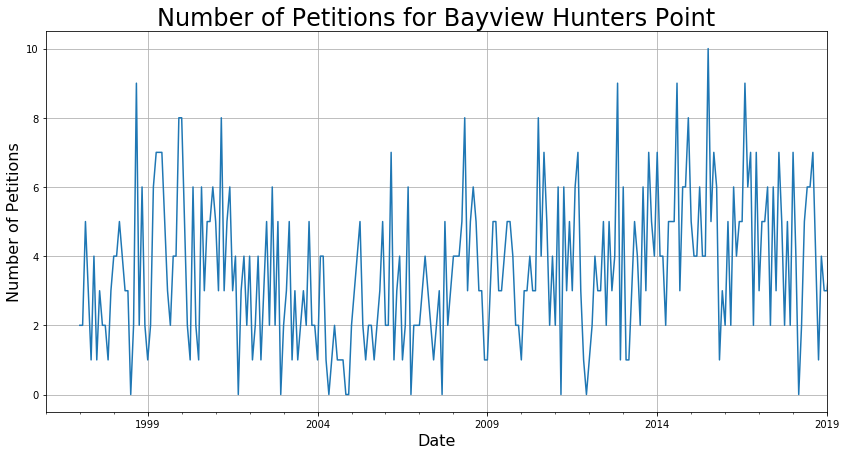

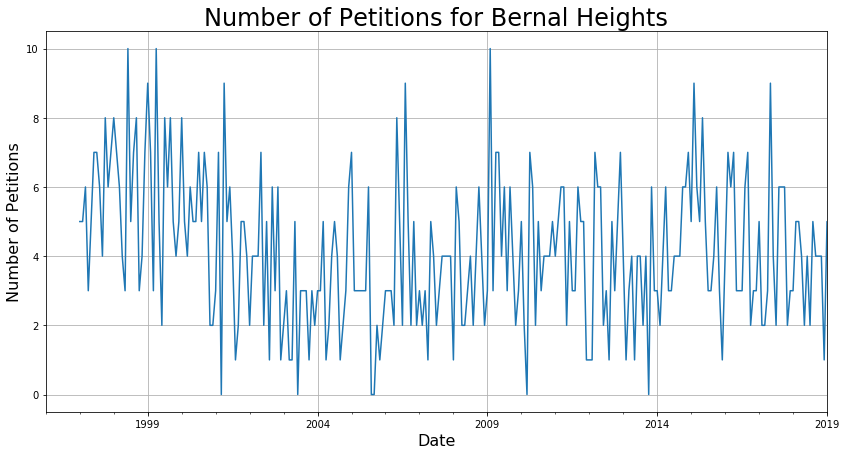

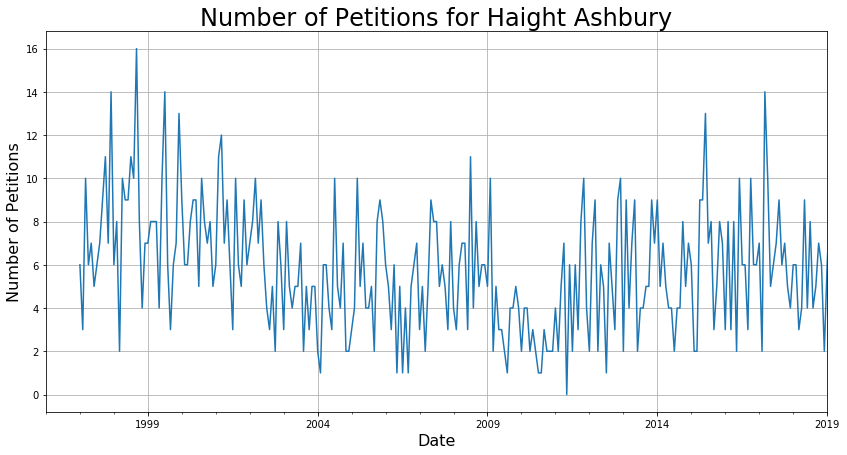

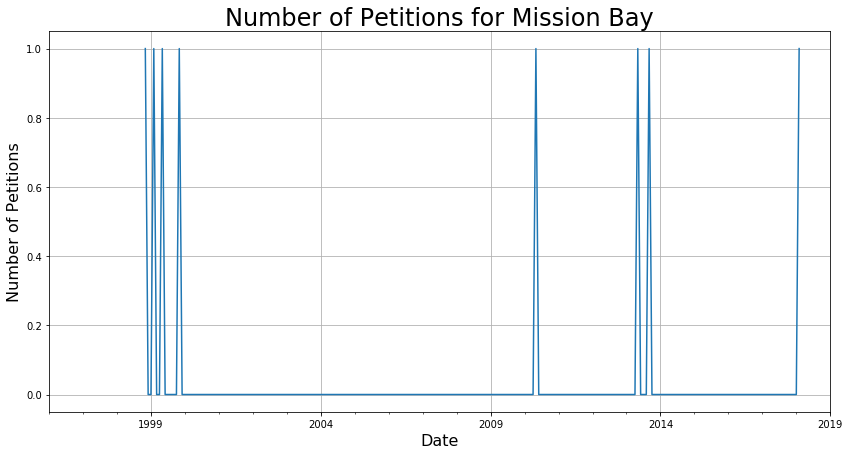

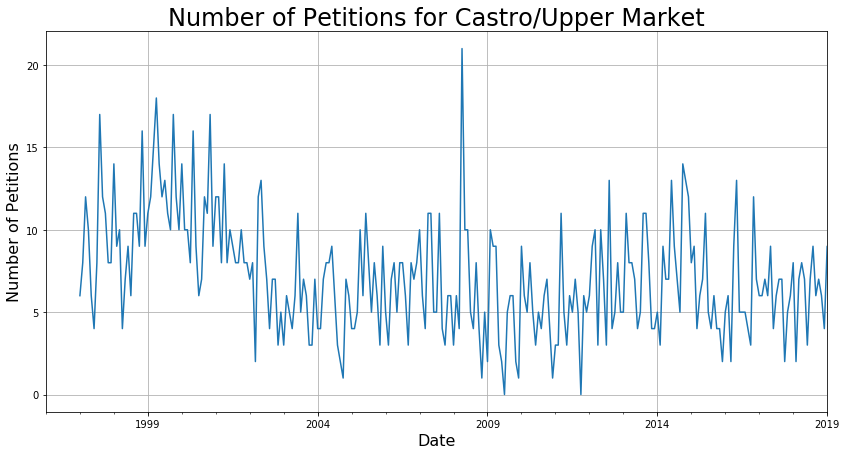

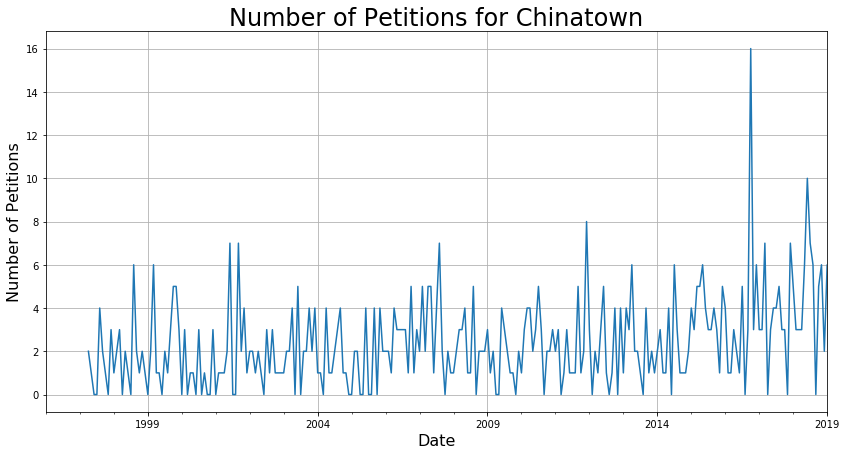

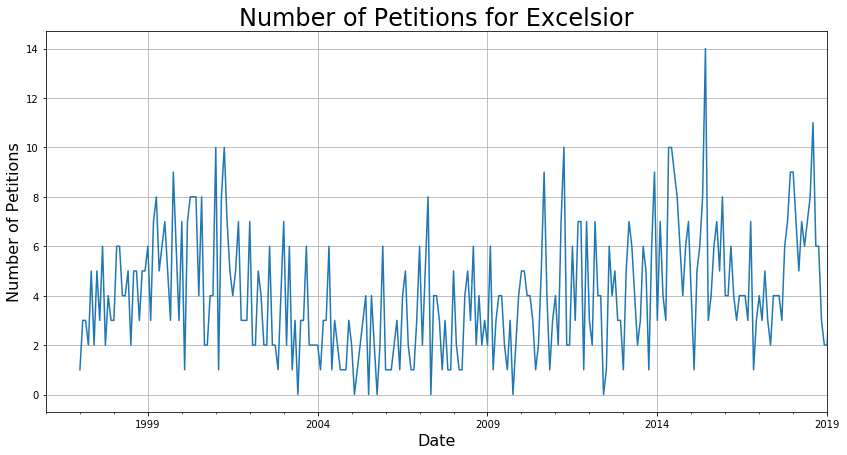

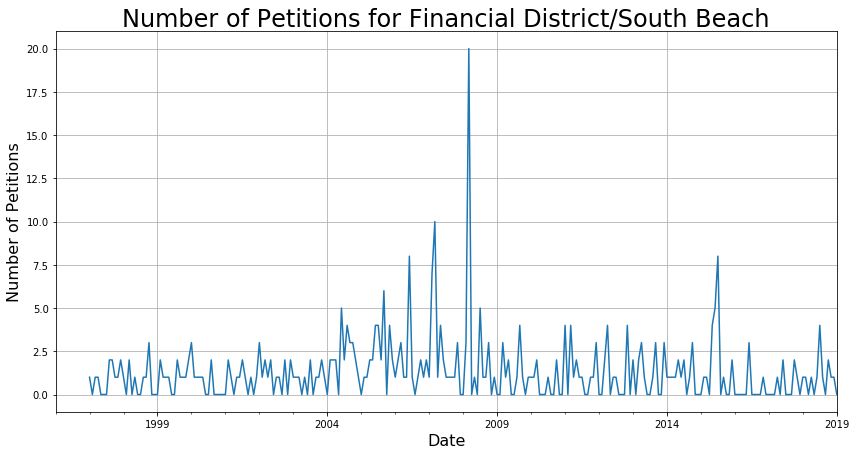

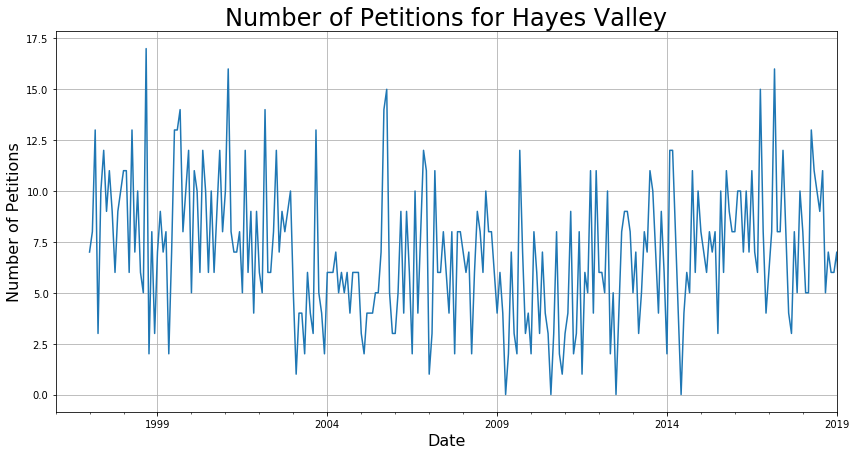

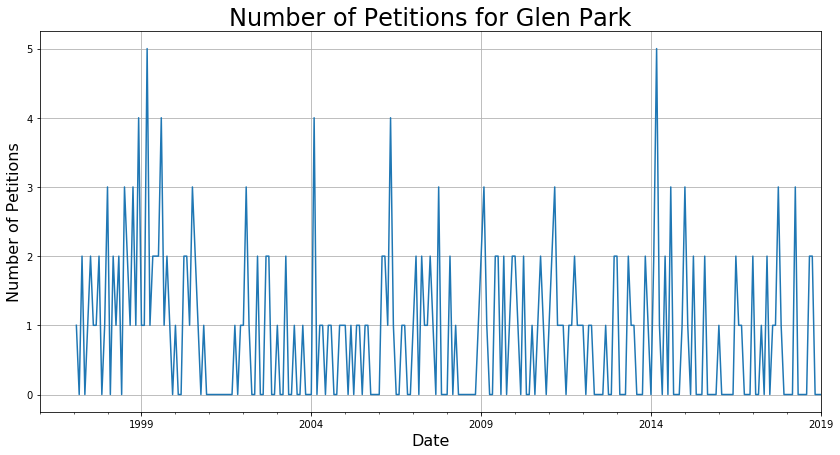

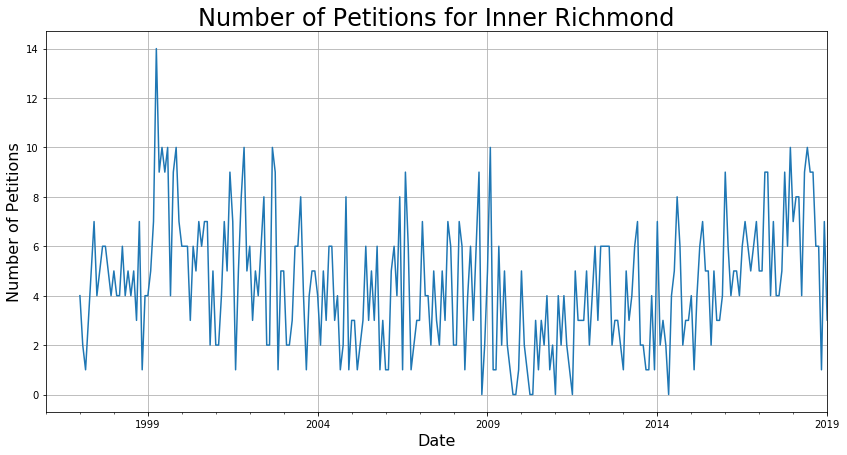

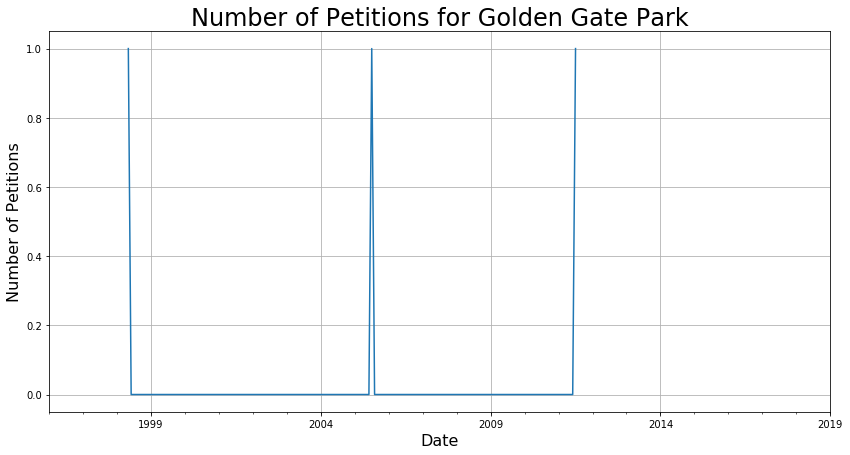

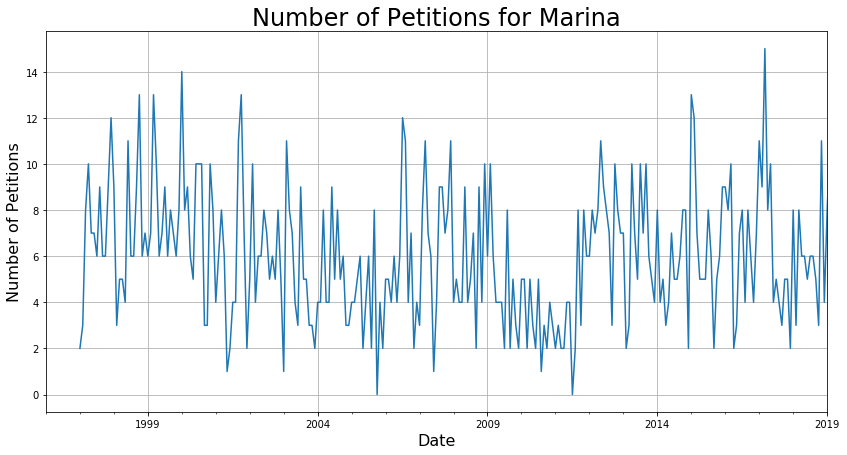

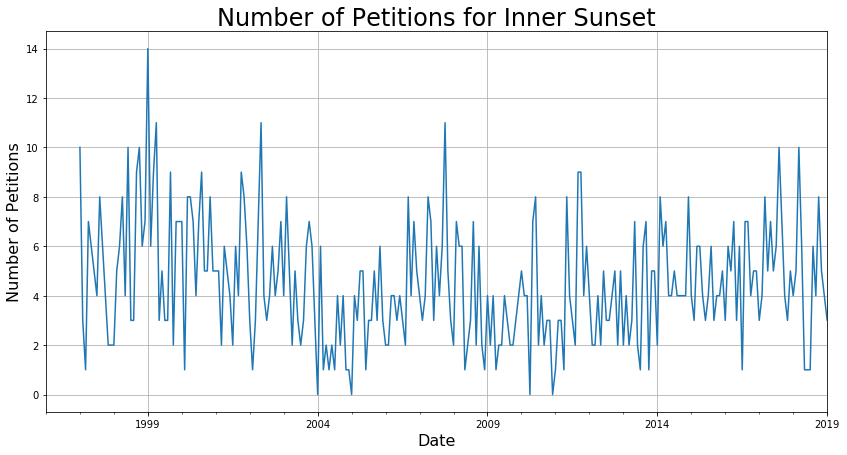

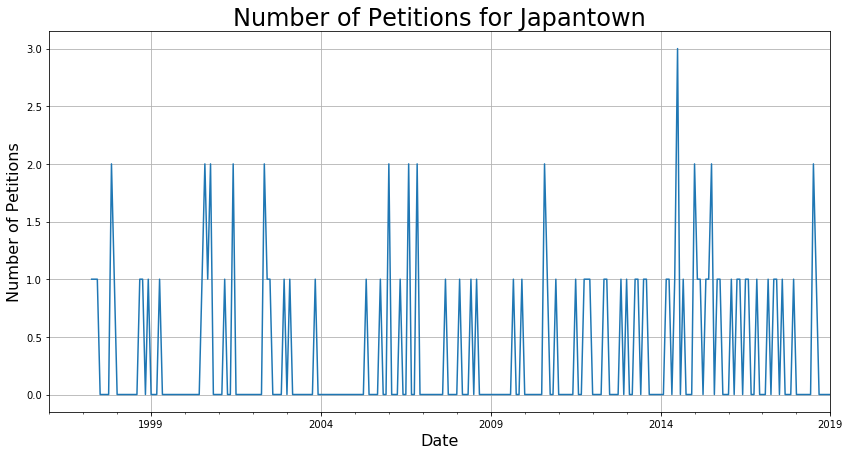

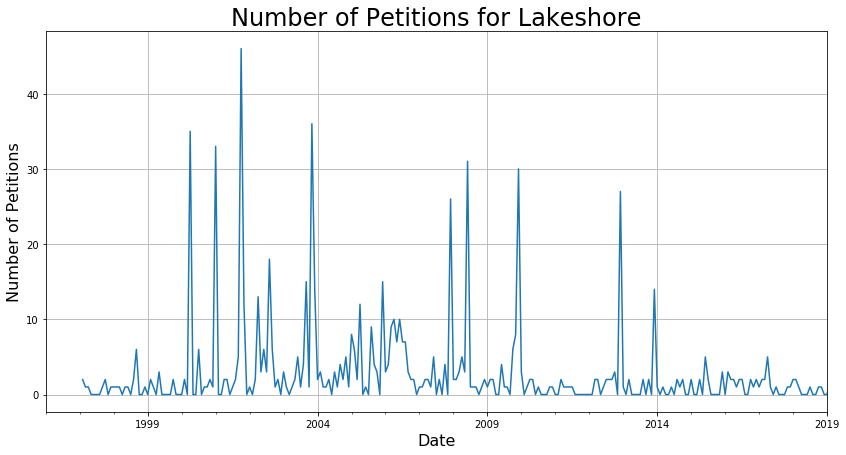

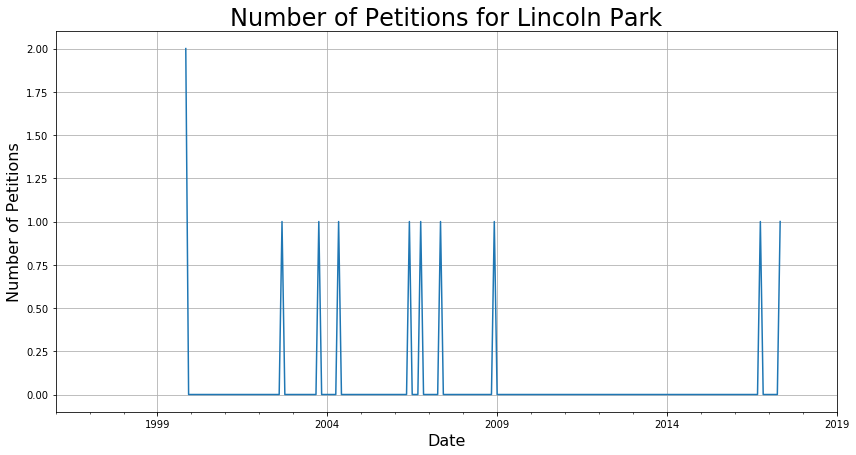

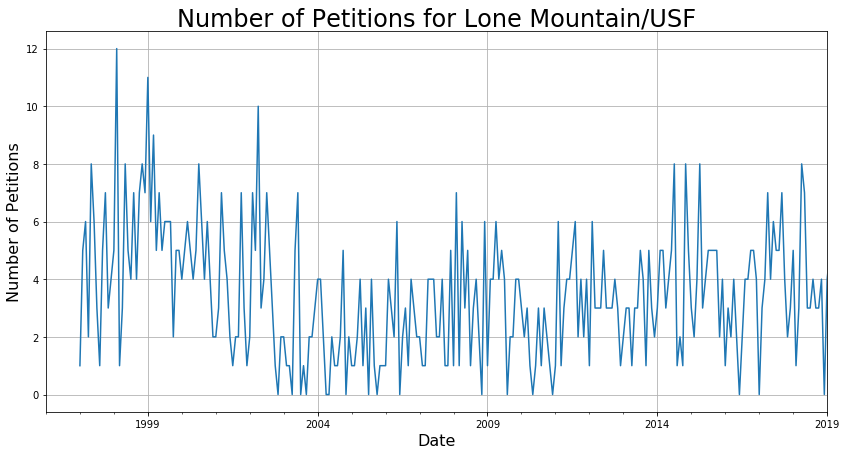

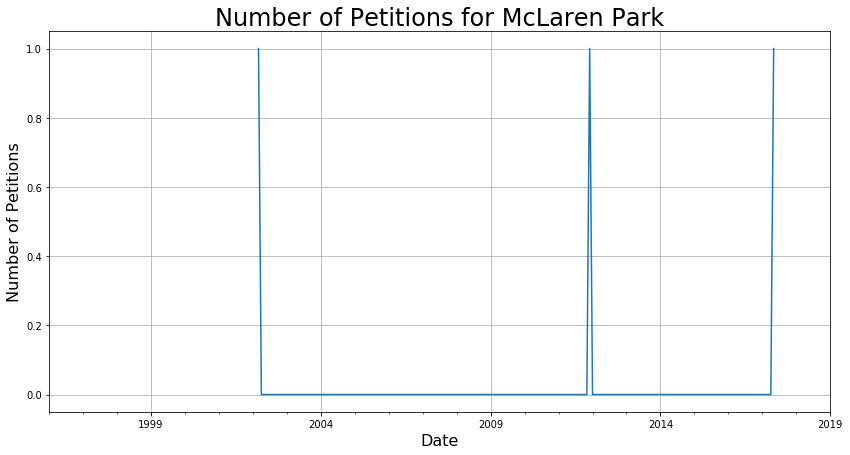

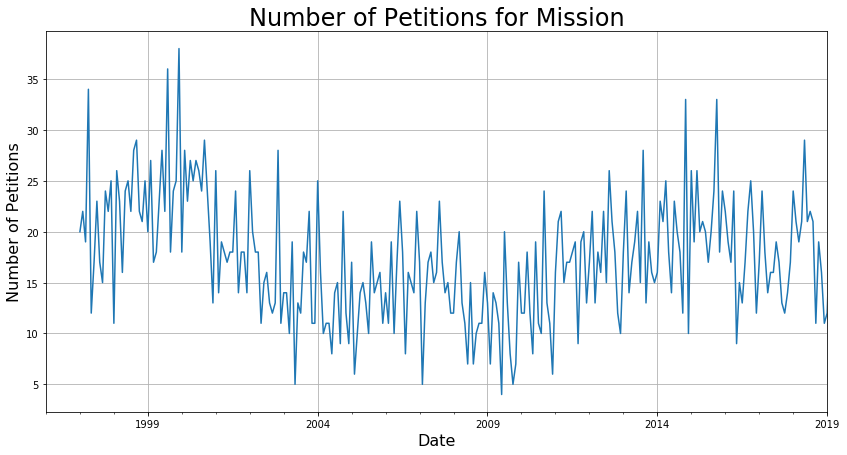

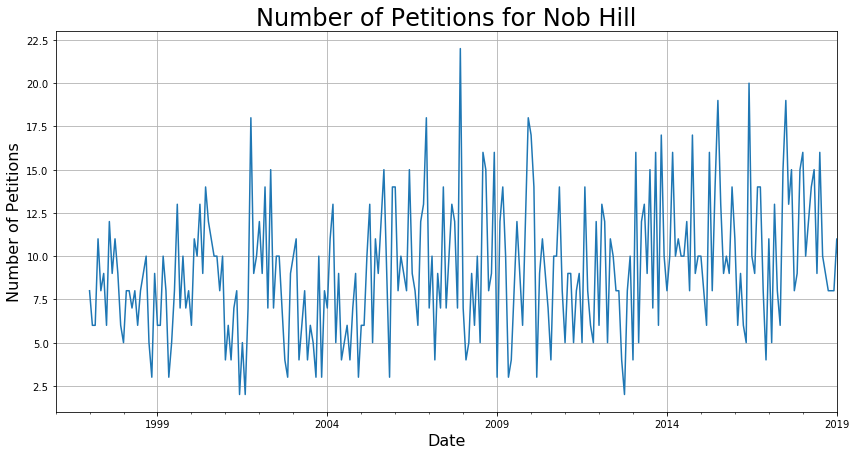

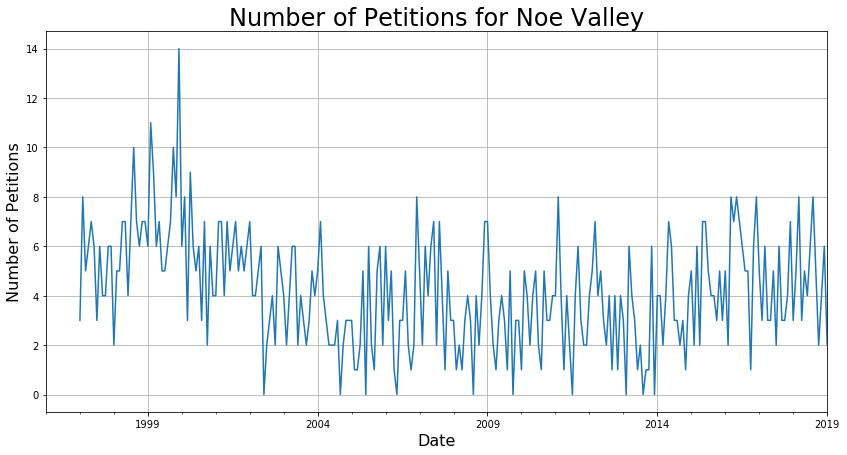

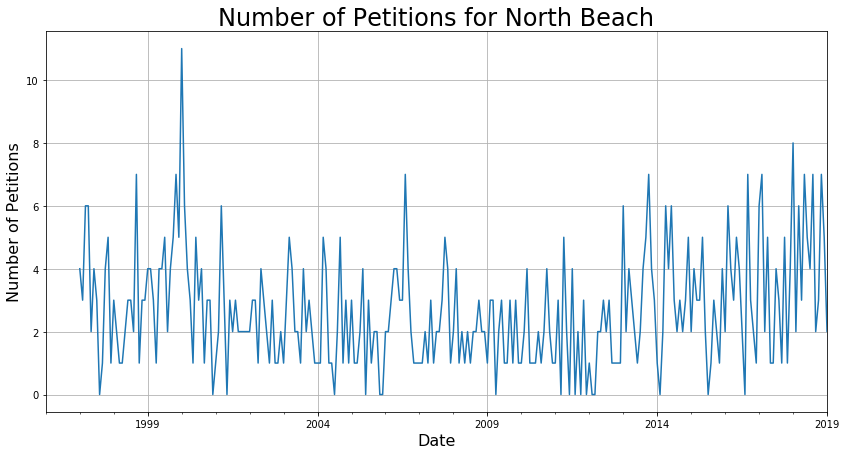

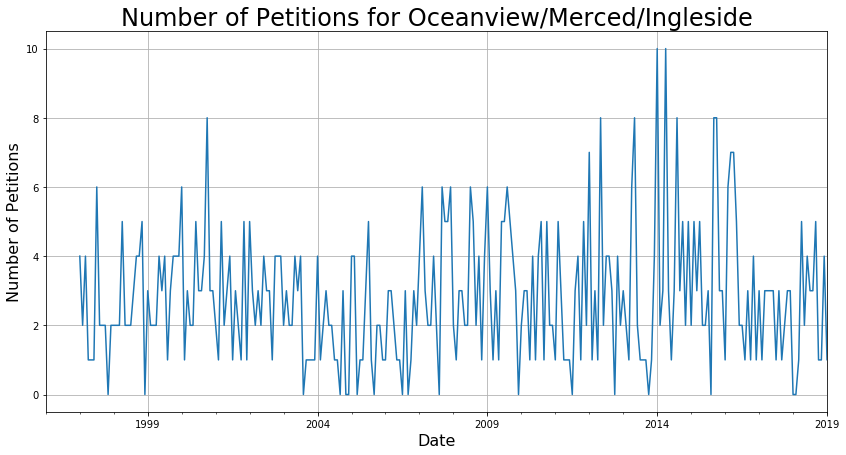

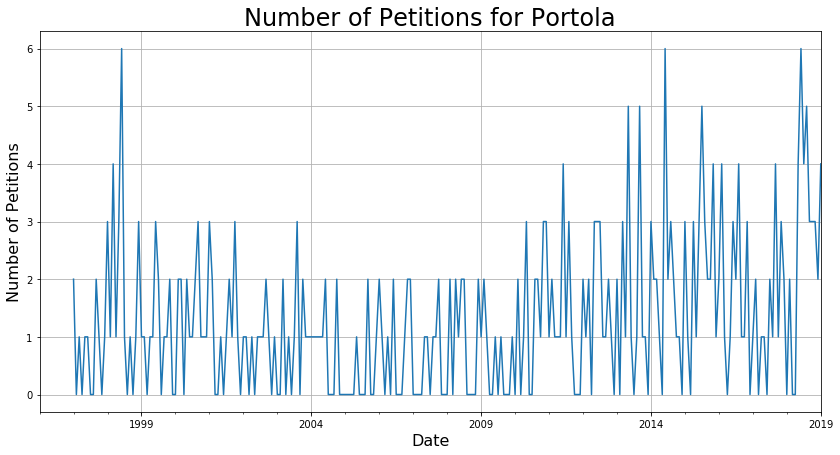

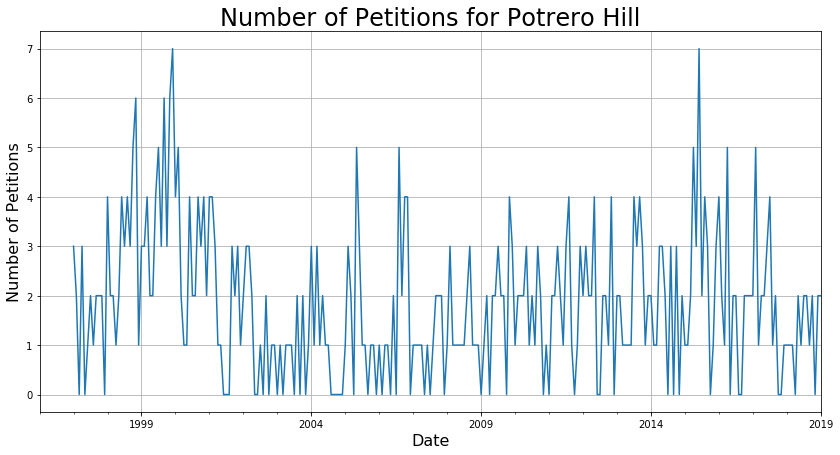

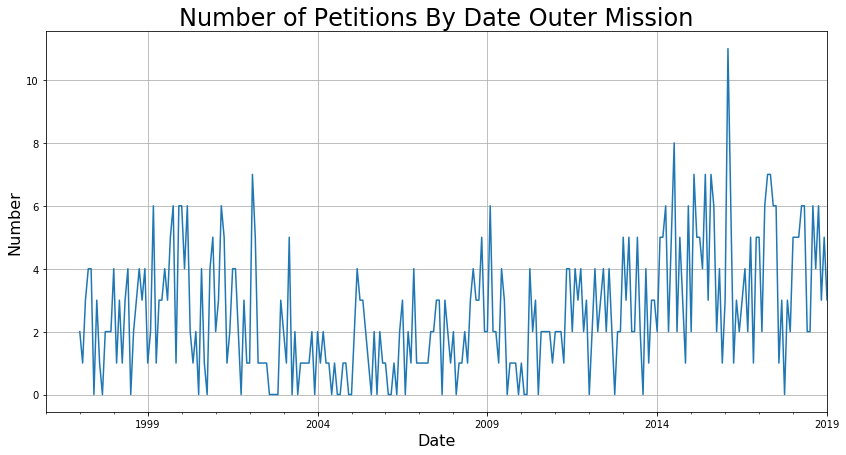

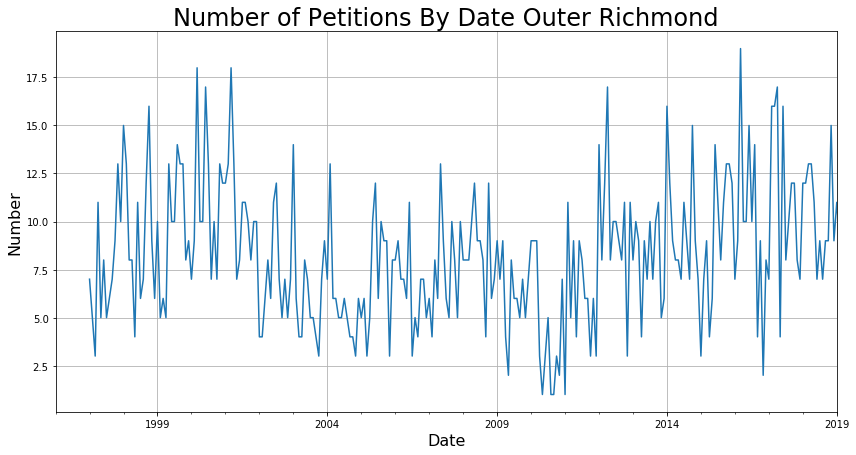

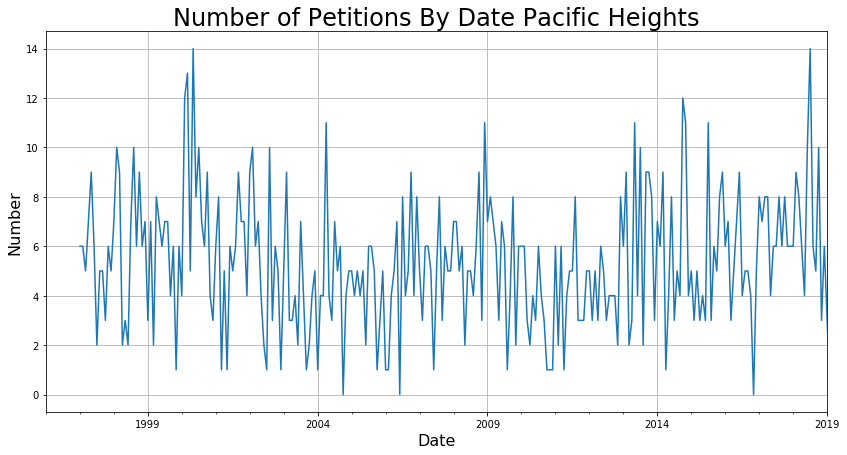

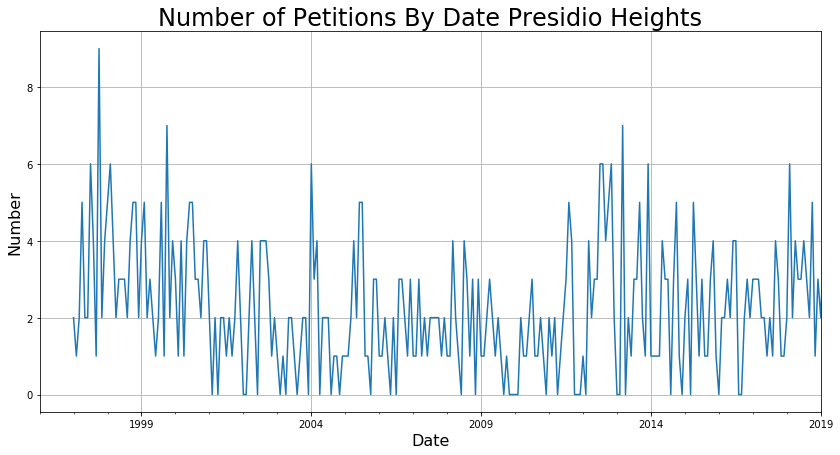

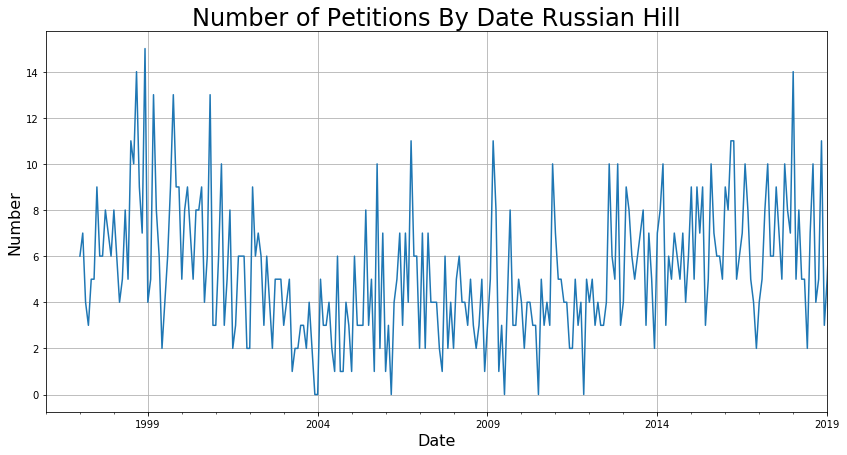

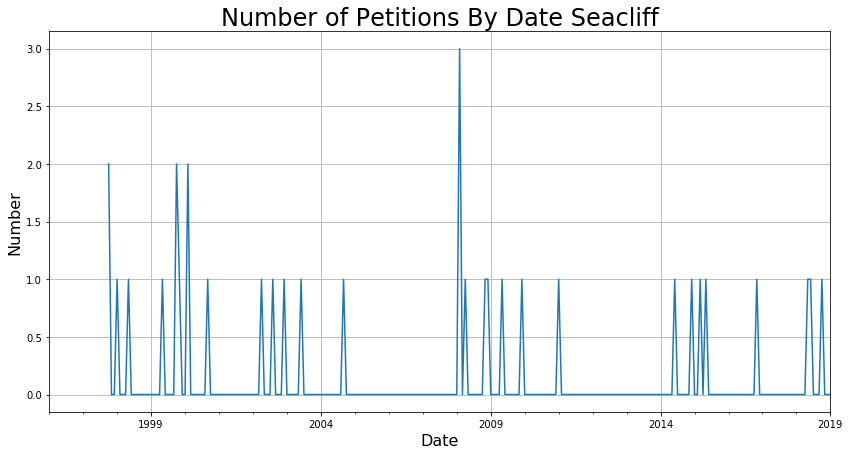

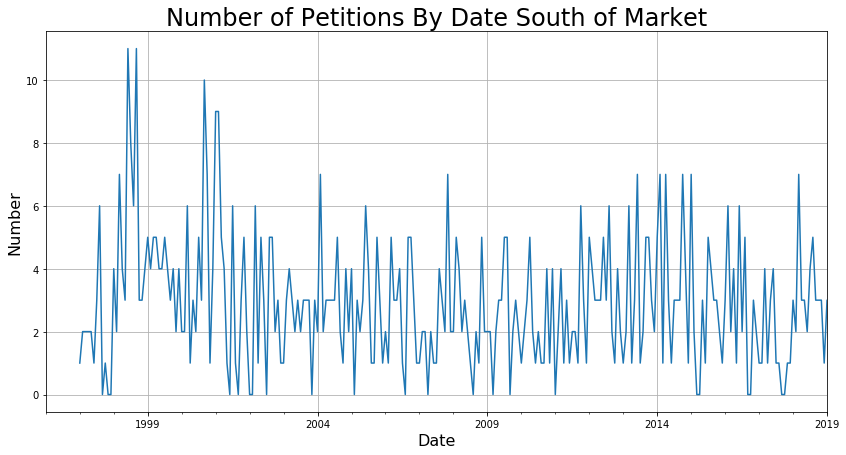

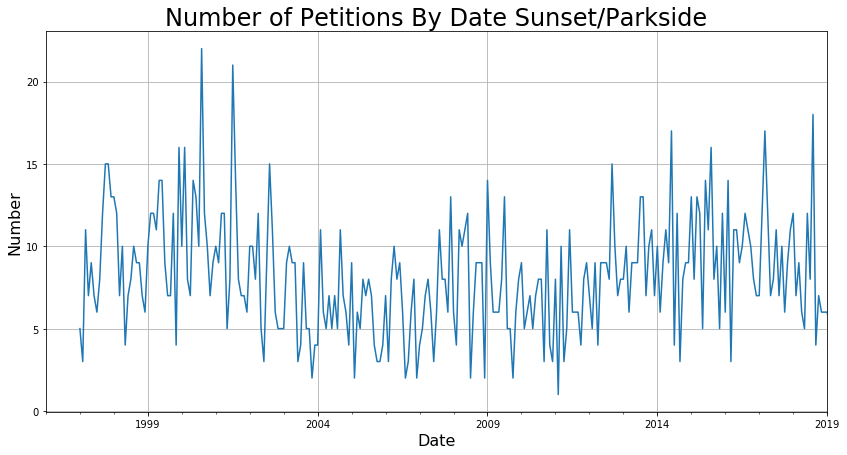

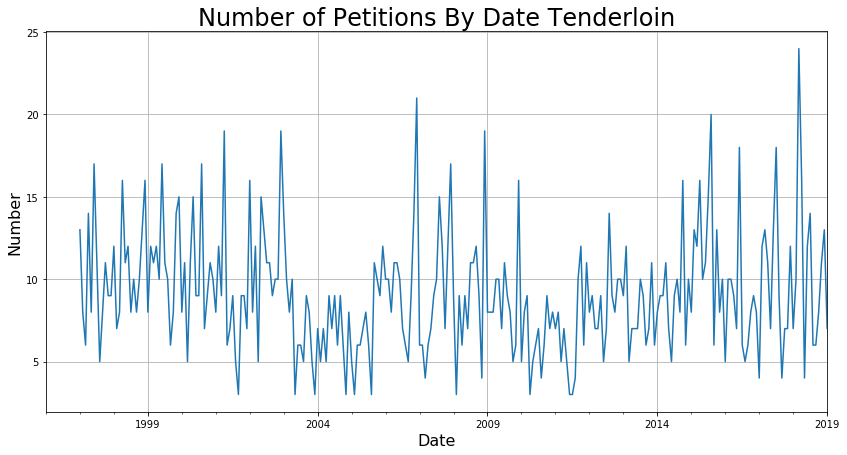

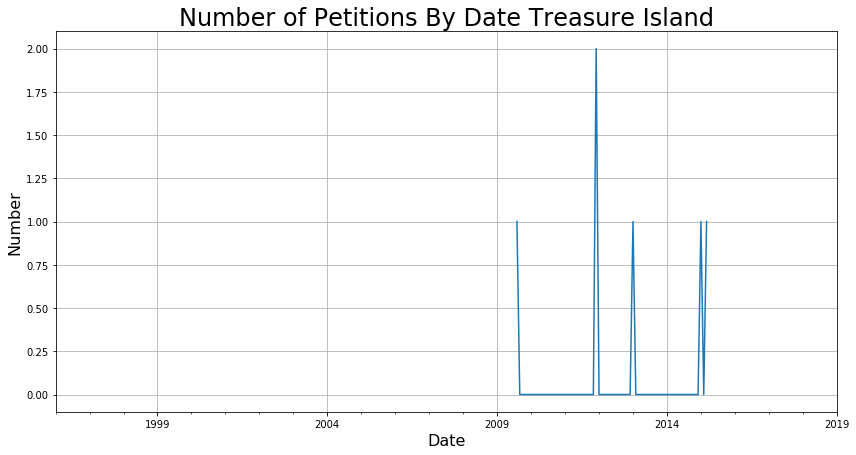

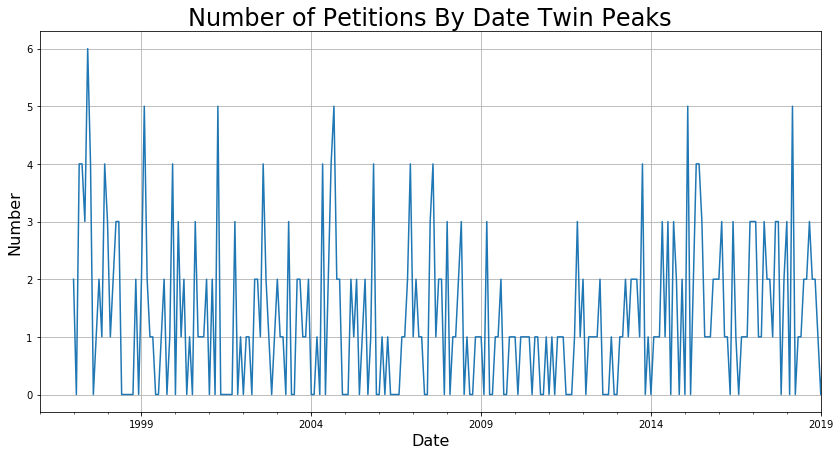

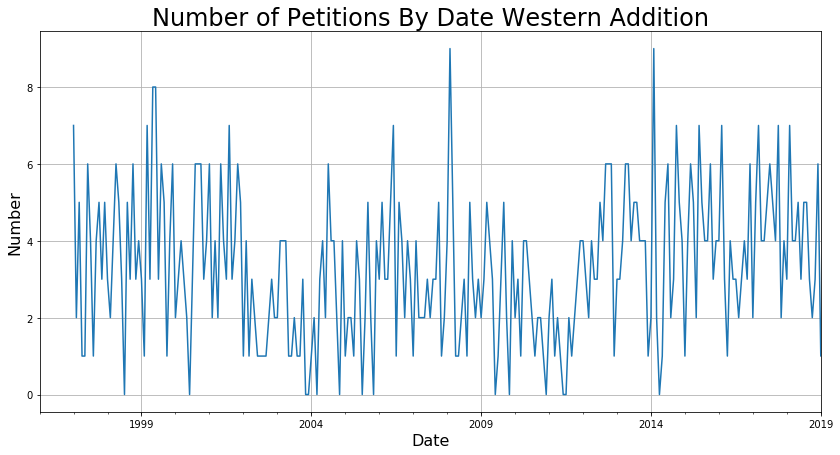

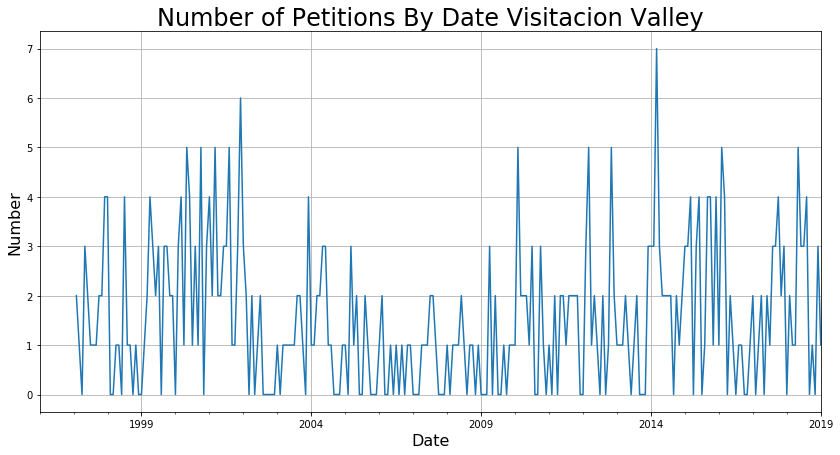

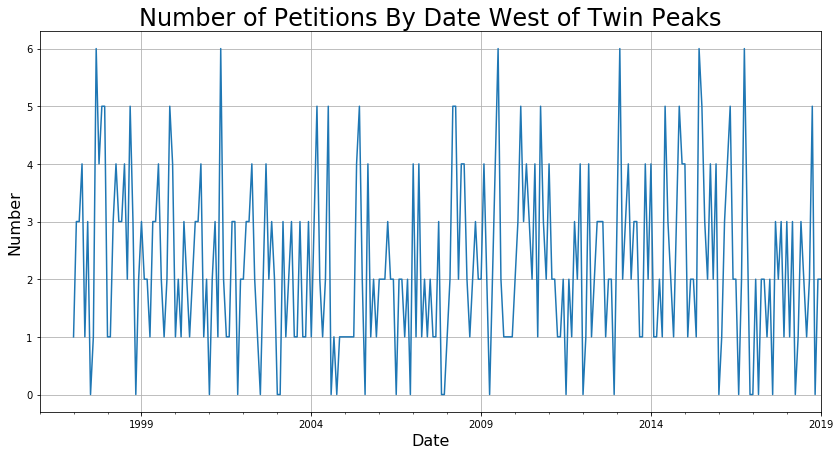

In [27]:
# Check distribution of data over time by neighborhood number one by one

for i in range(1, 27):
    petition_counts_by_neighborhood_df[i] \
        .plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number of Petitions', fontsize=16)
    plt.title('Number of Petitions for {}'.format(neighborhood_dict[i]), fontsize=24)
    plt.grid(True)
    plt.savefig("figures/neighborhood/petitions-for-{}.png".format(neighborhood_dict[i].lower().replace(" ", "-").replace("/", "-")), transparent=True, bbox_inches="tight")
    plt.show()
    
# Check distribution of data over time by neighborhood number
for i in range(28, 42):
    petition_counts_by_neighborhood_df[i] \
        .plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number', fontsize=16)
    plt.title('Number of Petitions By Date {}'.format(neighborhood_dict[i]), fontsize=24)
    plt.grid(True)
    plt.savefig("figures/neighborhood/petitions-for-{}.png".format(neighborhood_dict[i].lower().replace(" ", "-").replace("/", "-")), transparent=True, bbox_inches="tight")
    plt.show()

In [7]:
# NA that has its own pattern
print(neighborhood_dict[16])

Lakeshore


In [8]:
# NAs that have sparse data
print(neighborhood_dict[15])
print(neighborhood_dict[33])
print(neighborhood_dict[40])

Japantown
Seacliff
Visitacion Valley


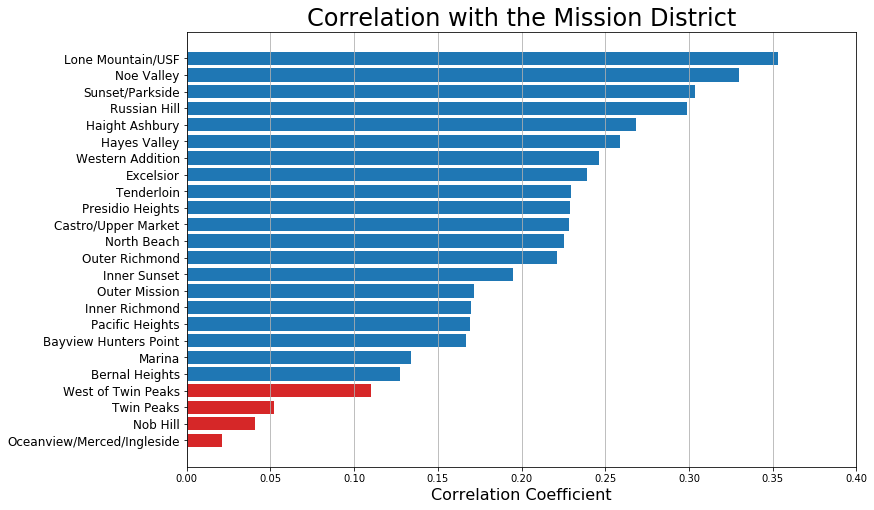

In [9]:
# Correlations with the Mission District

features_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).corr()[neighborhood_dict[20]].sort_values().index)
correlation_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).corr()[neighborhood_dict[20]].sort_values())
features_correlation_dict = dict(zip(features_list, correlation_list))

# Highlight colors below threwshold
my_colors = []
for i in correlation_list:
    if i >= 0.11:
        my_colors.append('#1f77b4') # Blue
    else:
        my_colors.append('#d62728') # Red

fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(correlation_list)-2)
ax.barh(y_pos, correlation_list[1:-1], align='center', capsize=3, color = my_colors)
ax.set_xlabel('Correlation Coefficient', fontsize=16)
ax.set_xlim(left = 0, right = 0.4)
ax.set_yticks(y_pos)
ax.set_yticklabels(features_list[1:-1], fontsize=12)
ax.set_title('Correlation with the Mission District', fontsize=24)
ax.xaxis.grid(True)
#plt.savefig('figures/neighborhood-correlation/correlation-with-mission.png', transparent = True, bbox_inches = 'tight')

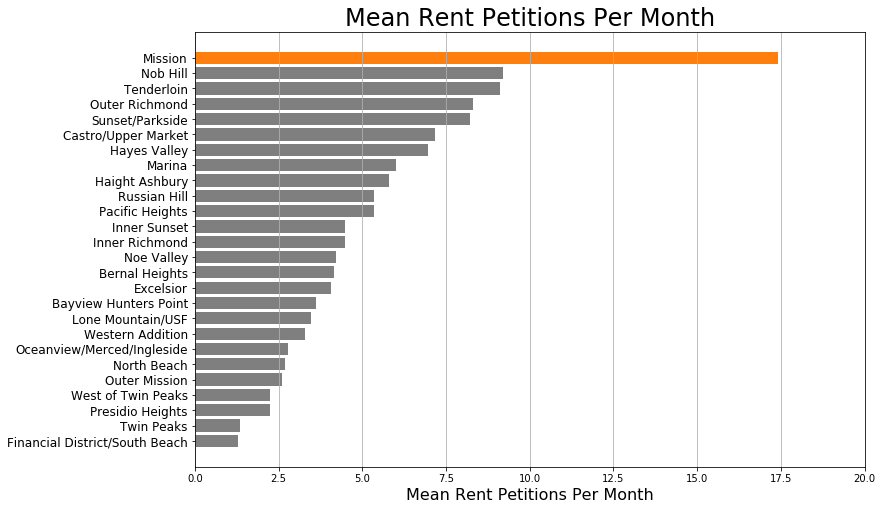

In [10]:
# Number of Rent Petitions by Neighborhood
features_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).mean(axis = 0).sort_values().index)
mean_count_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).mean(axis = 0).sort_values())

my_colors = ['#ff7f0e']
for i in range(len(mean_count_list)-1):
    my_colors.append('#7f7f7f')
my_colors = my_colors[::-1]

fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(mean_count_list))
ax.barh(y_pos, mean_count_list, align='center', capsize=3, color = my_colors)
ax.set_xlabel('Mean Rent Petitions Per Month', fontsize=16)
ax.set_xlim(left = 0, right = 20)
ax.set_yticks(y_pos)
ax.set_yticklabels(features_list, fontsize=12)
ax.set_title('Mean Rent Petitions Per Month', fontsize=24)
ax.xaxis.grid(True)
#plt.savefig('figures/correlation/mean-rent-petitions-by-neighborhood.png', transparent = True, bbox_inches = 'tight')

# Grouping Neighborhoods

In [11]:
# Collect all count results

petition_counts_by_neighborhood_df = petition_df[petition_df['Neighborhood Number'] == 1] \
    [['Petition ID Len', 'Datetime']] \
    .groupby(pd.TimeGrouper("M", key="Datetime")).count().rename(columns = {"Petition ID Len": 1})

for i in range(2, 27):
    petition_counts_by_neighborhood_df[i] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
for i in range(28, 42):
    petition_counts_by_neighborhood_df[i] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
petition_counts_by_neighborhood_df

1   2   3    4   5     6   7   8   9    10 ...  32   33    34  35  \
Datetime                                               ...                      
1997-01-31   2   5   6  NaN   6   NaN   1   1   7  NaN ...   6  NaN   1.0   5   
1997-02-28   2   5   3  NaN   8   NaN   3   0   8  1.0 ...   7  NaN   2.0   3   
1997-03-31   5   6  10  NaN  12   NaN   3   1  13  0.0 ...   4  NaN   2.0  11   
1997-04-30   3   3   6  NaN  10   2.0   2   1   3  2.0 ...   3  NaN   2.0   7   
1997-05-31   1   5   7  NaN   6   1.0   5   0  10  0.0 ...   5  NaN   2.0   9   
1997-06-30   4   7   5  NaN   4   0.0   2   0  12  1.0 ...   5  NaN   1.0   7   
1997-07-31   1   7   6  NaN   8   0.0   5   0   9  2.0 ...   9  NaN   3.0   6   
1997-08-31   3   6   7  NaN  17   4.0   3   2  11  1.0 ...   6  NaN   6.0   8   
1997-09-30   2   4   9  NaN  12   2.0   6   2   9  1.0 ...   6  NaN   0.0  12   
1997-10-31   2   8  11  NaN  11   1.0   2   1   6  2.0 ...   8  2.0   1.0  15   
1997-11-30   1   6   7  NaN   8   0.0   4   1   9  0.0 ...   7  0.0   0.0  15   
1997-12-31   3   7  14  NaN   8   3.0   3   2  10  1.0 ...   6  0.0   0.0  13   
1998-01-31   4   8   6  NaN  14   1.0   3   1  11  3.0 ...   8  1.0   4.0  13   
1998-02-28   4   7   8  NaN   9   2.0   6   0  11  0.0 ...   6  0.0   2.0  12   
1998-03-31   5   6   2  NaN  10   3.0   6   2   6  2.0 ...   4  0.0   7.0   7   
1998-04-30   4   4  10  NaN   4   0.0   4   0  13  1.0 ...   5  0.0   4.0  10   
1998-05-31   3   3   9  NaN   7   2.0   4   1   7  2.0 ...   8  1.0   3.0   4   
1998-06-30   3  10   9  NaN   9   1.0   5   0  10  0.0 ...   5  0.0  11.0   7   
1998-07-31   0   5  11  NaN   6   0.0   2   0   6  3.0 ...  11  0.0   8.0   8   
1998-08-31   2   7  10  NaN  11   6.0   5   1   5  2.0 ...  10  0.0   6.0  10   
1998-09-30   9   8  16  NaN  11   2.0   5   1  17  1.0 ...  14  0.0  11.0   9   
1998-10-31   2   3   8  NaN   9   1.0   3   3   2  3.0 ...   9  0.0   3.0   9   
1998-11-30   6   4   4  1.0  16   2.0   5   0   8  1.0 ...   7  0.0   3.0   7   
1998-12-31   2   7   7  0.0   9   1.0   5   0   3  4.0 ...  15  0.0   4.0   6   
1999-01-31   1   9   7  0.0  11   0.0   6   0   7  1.0 ...   4  0.0   5.0  10   
1999-02-28   2   7   8  1.0  12   2.0   3   2   9  1.0 ...   5  0.0   4.0  12   
1999-03-31   6   3   8  0.0  15   6.0   7   1   7  5.0 ...  13  0.0   5.0  12   
1999-04-30   7  10   8  0.0  18   1.0   8   1   8  1.0 ...   8  0.0   5.0  11   
1999-05-31   7   5   4  1.0  14   1.0   5   1   2  2.0 ...   6  1.0   4.0  14   
1999-06-30   7   2  10  0.0  12   0.0   6   0   7  2.0 ...   2  0.0   4.0  14   
...         ..  ..  ..  ...  ..   ...  ..  ..  ..  ... ...  ..  ...   ...  ..   
2016-10-31   7   2  10  0.0   3  16.0   7   0  15  0.0 ...   5  0.0   0.0  10   
2016-11-30   2   3   6  0.0  12   3.0   1   1   8  0.0 ...   4  1.0   3.0   8   
2016-12-31   7   3   6  0.0   7   6.0   3   0   4  0.0 ...   2  0.0   2.0   7   
2017-01-31   3   5   7  0.0   6   3.0   4   0   6  2.0 ...   4  0.0   1.0   7   
2017-02-28   5   2   2  0.0   6   3.0   3   0   8  0.0 ...   5  0.0   1.0  12   
2017-03-31   5   2  14  0.0   7   7.0   5   0  16  0.0 ...   8  0.0   4.0  17   
2017-04-30   6   3  10  0.0   6   0.0   3   1   8  1.0 ...  10  0.0   1.0  12   
2017-05-31   2   9   5  0.0   9   3.0   2   0   8  0.0 ...   6  0.0   3.0   7   
2017-06-30   6   4   6  0.0   4   4.0   4   2  12  2.0 ...   6  0.0   4.0   8   
2017-07-31   3   2   7  0.0   6   4.0   4   0   8  0.0 ...   9  0.0   1.0  11   
2017-08-31   7   6   9  0.0   7   5.0   4   0   4  1.0 ...   7  0.0   1.0   7   
2017-09-30   5   6   6  0.0   7   3.0   3   0   3  1.0 ...   5  0.0   0.0  10   
2017-10-31   2   6   7  0.0   2   3.0   6   2   8  3.0 ...  10  0.0   0.0   6   
2017-11-30   5   2   5  0.0   5   0.0   7   1   5  1.0 ...   8  0.0   1.0   9   
2017-12-31   2   3   4  0.0   6   7.0   9   0  10  0.0 ...   7  0.0   1.0  11   
2018-01-31   7   3   6  0.0   8   5.0   9   1   8  0.0 ...  14  0.0   3.0  12   
2018-02-28   4   5   6  1.0   2   3.0   7  

In [12]:
time_varying_neighborhoods_list = petition_counts_by_neighborhood_df.dropna(axis = 1).drop(columns = [8, 21, 24, 38, 41]).columns
stationary_neighborhoods_list = sorted(list(set(petition_counts_by_neighborhood_df.columns).difference(set(time_varying_neighborhoods_list))))
na_neighborhoods_list = sorted(list(set(petition_counts_by_neighborhood_df.columns).difference(set(petition_counts_by_neighborhood_df.dropna(axis = 1)))))

In [13]:
time_varying_neighborhoods_list

Int64Index([1, 2, 3, 5, 7, 9, 11, 13, 14, 18, 20, 22, 23, 28, 29, 30, 31, 32,
            35, 36, 39],
           dtype='int64')

In [14]:
stationary_neighborhoods_list

[4, 6, 8, 10, 12, 15, 16, 17, 19, 21, 24, 25, 26, 33, 34, 37, 38, 40, 41]

# Separating Time-Varying from Stationary Neighborhoods

In [15]:
petition_month_count_clean_ser = petition_counts_by_neighborhood_df[time_varying_neighborhoods_list].sum(axis=1)

Text(0.5,1,'Time-Varying vs. Stationary Neighborhoods')

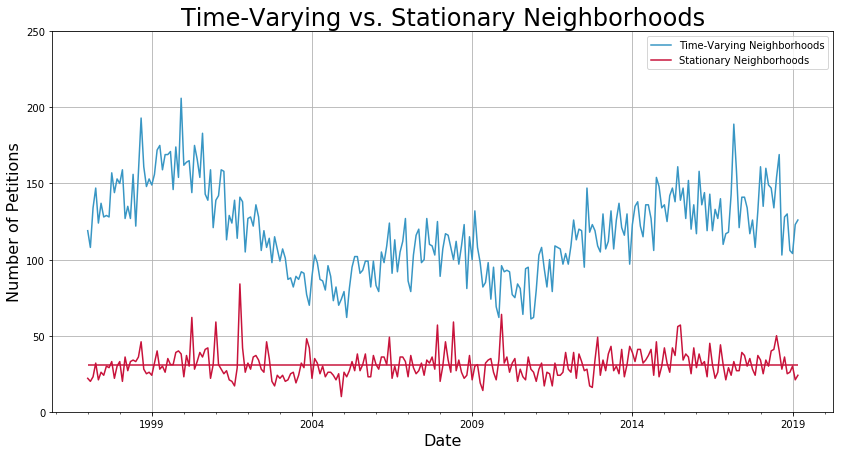

In [16]:
# Combined Distributions
fig, ax = plt.subplots(figsize=(14, 7))
petition_month_count_clean_ser.plot(kind="line", color='#3896c4', label = 'Time-Varying Neighborhoods')
petition_counts_by_neighborhood_df[stationary_neighborhoods_list].sum(axis=1).plot(kind="line", label = 'Stationary Neighborhoods', color = '#c8133b')
plt.hlines(y=petition_counts_by_neighborhood_df[stationary_neighborhoods_list].sum(axis=1).mean(), xmin=min(petition_month_count_clean_ser.index), xmax=max(petition_month_count_clean_ser.index), color = '#c8133b')
plt.ylim(0, 250)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Petitions', fontsize=16)
plt.legend(loc = 'upper right')
ax.grid(True)
plt.title('Time-Varying vs. Stationary Neighborhoods', fontsize=24)
#plt.savefig("figures/neighborhood-correlation/time-varying-vs-stationary-neighborhoods.png", transparent=True, bbox_inches="tight")